# Netflix EDA and Data Visualization
This notebook is an EDA of a netflix Dataset that consists of contents added to Netflix from 2008 to 2021.

The purpose of this analysis is to explore, clean and create data visualizations using matplotlib and Tableau.

## Resources:
* Netflix dataset on kaggle (https://www.kaggle.com/datasets/shivamb/netflix-shows)
* Piechart from Python Charts (https://python-charts.com/part-whole/pie-chart-matplotlib/#colors)
* Matplotlib colors format (https://matplotlib.org/stable/users/explain/colors/colors.html)
* TV parental Guidelines (https://en.wikipedia.org/wiki/TV_Parental_Guidelines#TV-G)


## 1- Import the data

In [490]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [491]:
movies = pd.read_csv('netflix_titles.csv')

In [492]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 2 - Change the Columns' Names for a Better Visualization

In [493]:
movies = movies.rename(columns={'date_added': 'date', 'listed_in':'category', 'rating': 'classification'})

In [494]:
movies.columns = movies.columns.str.capitalize()

In [495]:
movies.head(3)

,Show_id,Type,Title,Director,Cast,Country,Date,Release_year,Classification,Duration,Category,Description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


## 3 - Check Movies Info and NANs

In [496]:
movies.shape

(8807, 12)

In [497]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Show_id         8807 non-null   object
 1   Type            8807 non-null   object
 2   Title           8807 non-null   object
 3   Director        6173 non-null   object
 4   Cast            7982 non-null   object
 5   Country         7976 non-null   object
 6   Date            8797 non-null   object
 7   Release_year    8807 non-null   int64 
 8   Classification  8803 non-null   object
 9   Duration        8804 non-null   object
 10  Category        8807 non-null   object
 11  Description     8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [498]:
pd.isnull(movies).sum()

Show_id              0
Type                 0
Title                0
Director          2634
Cast               825
Country            831
Date                10
Release_year         0
Classification       4
Duration             3
Category             0
Description          0
dtype: int64

## 4- Delete NANs from the Duration, Classification and Date Columns

In [499]:
movies= movies.dropna(subset = ['Duration','Classification', 'Date'])

In [500]:
pd.isnull(movies).sum()

Show_id              0
Type                 0
Title                0
Director          2621
Cast               825
Country            829
Date                 0
Release_year         0
Classification       0
Duration             0
Category             0
Description          0
dtype: int64

## 5 - Deal with the NANs in the Country, Cast, and Director Columns

As there are a lot of NANs I decided to replace by Unknown to not affect the analysis.

In [501]:
movies[['Country', 'Cast', 'Director']] = movies[['Country', 'Cast', 'Director']].replace(np.nan, 'Unknown')

In [502]:
movies['Country'].value_counts()

Country
United States                             2809
India                                      972
Unknown                                    829
United Kingdom                             418
Japan                                      243
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64

In [503]:
movies.isnull().sum()

Show_id           0
Type              0
Title             0
Director          0
Cast              0
Country           0
Date              0
Release_year      0
Classification    0
Duration          0
Category          0
Description       0
dtype: int64

## 6 - Transform the Date column into Datatime

In [504]:
from datetime import datetime

In [505]:
movies['Date'] = movies['Date'].str.strip() #to remove before and after spaces
movies['Date'] = pd.to_datetime(movies['Date'], format="%B %d, %Y")

In [506]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Show_id         8790 non-null   object        
 1   Type            8790 non-null   object        
 2   Title           8790 non-null   object        
 3   Director        8790 non-null   object        
 4   Cast            8790 non-null   object        
 5   Country         8790 non-null   object        
 6   Date            8790 non-null   datetime64[ns]
 7   Release_year    8790 non-null   int64         
 8   Classification  8790 non-null   object        
 9   Duration        8790 non-null   object        
 10  Category        8790 non-null   object        
 11  Description     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 892.7+ KB


## ? Create a subset of cast (if I find another dataset)

In [507]:
#movies= movies.drop(columns=['Cast'])
#count how many names in the cast

In [508]:
movies.head(3)

,Show_id,Type,Title,Director,Cast,Country,Date,Release_year,Classification,Duration,Category,Description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [509]:
movies['Cast'].value_counts()

Cast
Unknown                                                                                                                                          825
David Attenborough                                                                                                                                19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                           14
Samuel West                                                                                                                                       10
Jeff Dunham                                                                                                                                        7
                                                                                                                                                ... 
Sanjay Dutt, Arjun Kapoor, Kriti Sanon, Zeenat Aman, Mohnish Bahl, Padmini Kolhapure, Kunal Kapoor, S

## 7 - Create a Subset for Country

In [510]:
countries = movies[['Show_id', 'Title', 'Country', 'Category']]

In [511]:
countries

,Show_id,Title,Country,Category
0,s1,Dick Johnson Is Dead,United States,Documentaries
1,s2,Blood & Water,South Africa,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,Ganglands,Unknown,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,Jailbirds New Orleans,Unknown,"Docuseries, Reality TV"
4,s5,Kota Factory,India,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...
8802,s8803,Zodiac,United States,"Cult Movies, Dramas, Thrillers"
8803,s8804,Zombie Dumb,Unknown,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Zombieland,United States,"Comedies, Horror Movies"
8805,s8806,Zoom,United States,"Children & Family Movies, Comedies"


In [512]:
countries['Country'].value_counts()

Country
United States                             2809
India                                      972
Unknown                                    829
United Kingdom                             418
Japan                                      243
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64

## 7a - Explode the Countries by Separated Rows

In [573]:
countries_clean = countries.assign(Country=countries['Country'].str.split(',')).explode('Country')
countries_clean['Country'] = countries_clean['Country'].str.strip()

In [574]:
countries_clean

,Show_id,Title,Country,Category
0,s1,Dick Johnson Is Dead,United States,Documentaries
1,s2,Blood & Water,South Africa,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,Ganglands,Unknown,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,Jailbirds New Orleans,Unknown,"Docuseries, Reality TV"
4,s5,Kota Factory,India,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...
8785,s8803,Zodiac,United States,"Cult Movies, Dramas, Thrillers"
8786,s8804,Zombie Dumb,Unknown,"Kids' TV, Korean TV Shows, TV Comedies"
8787,s8805,Zombieland,United States,"Comedies, Horror Movies"
8788,s8806,Zoom,United States,"Children & Family Movies, Comedies"


In [575]:
countries_clean['Country'].value_counts()

Country
United States     3681
India             1046
Unknown            829
United Kingdom     805
Canada             445
                  ... 
Ecuador              1
Armenia              1
Mongolia             1
Bahamas              1
Montenegro           1
Name: count, Length: 124, dtype: int64

## 7b - Create a New Column to Store the Original Combination of Countries

In [576]:
countries_clean = countries_clean.reset_index(drop=True)
countries = countries.reset_index(drop=True)
countries_clean['Countries_Combined'] = countries['Country']

In [555]:
countries_clean

,Show_id,Title,Country,Category,country,Countries_Combined
0,s1,Dick Johnson Is Dead,United States,Documentaries,[United States],United States
1,s2,Blood & Water,South Africa,"International TV Shows, TV Dramas, TV Mysteries",[South Africa],South Africa
2,s3,Ganglands,Unknown,"Crime TV Shows, International TV Shows, TV Act...",[Unknown],Unknown
3,s4,Jailbirds New Orleans,Unknown,"Docuseries, Reality TV",[Unknown],Unknown
4,s5,Kota Factory,India,"International TV Shows, Romantic TV Shows, TV ...",[India],India
...,...,...,...,...,...,...
8785,s8803,Zodiac,United States,"Cult Movies, Dramas, Thrillers",[United States],United States
8786,s8804,Zombie Dumb,Unknown,"Kids' TV, Korean TV Shows, TV Comedies",[Unknown],Unknown
8787,s8805,Zombieland,United States,"Comedies, Horror Movies",[United States],United States
8788,s8806,Zoom,United States,"Children & Family Movies, Comedies",[United States],United States


In [577]:
countries_clean['Country'].value_counts()

Country
United States     3681
India             1046
Unknown            829
United Kingdom     805
Canada             445
                  ... 
Ecuador              1
Armenia              1
Mongolia             1
Bahamas              1
Montenegro           1
Name: count, Length: 124, dtype: int64

In [578]:
countries_clean['Countries_Combined'].value_counts()

Countries_Combined
United States                             2809
India                                      972
Unknown                                    829
United Kingdom                             418
Japan                                      243
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64

## 7c - Create an CSV File for the countries_clean

In [586]:
movies.columns

Index(['Show_id', 'Type', 'Title', 'Director', 'Cast', 'Country', 'Date',
       'Release_year', 'Classification', 'Duration', 'Category',
       'Description'],
      dtype='object')

In [583]:
country_clean = pd.DataFrame(countries_clean)

In [584]:
country_clean = country_clean.to_csv('country_clean.csv', index=False)

## 8 - Sentiment Analysis of the Description Column

Perform the sentiment analysis to try to find out the movies and series category by analysing the main words.

In [520]:
from nltk import word_tokenize
#or from nltk.tokenize import RegexpTokenizer

from nltk.stem import WordNetLemmatizer
#or from nltk.stem.snowball import SnowballStemmer
import string

from nltk.corpus import stopwords
import nltk


In [521]:
movies_desc = movies['Description']

In [522]:
movies_desc

0       As her father nears the end of his life, filmm...
1       After crossing paths at a party, a Cape Town t...
2       To protect his family from a powerful drug lor...
3       Feuds, flirtations and toilet talk go down amo...
4       In a city of coaching centers known to train I...
                              ...                        
8802    A political cartoonist, a crime reporter and a...
8803    While living alone in a spooky town, a young g...
8804    Looking to survive in a world taken over by zo...
8805    Dragged from civilian life, a former superhero...
8806    A scrappy but poor boy worms his way into a ty...
Name: Description, Length: 8790, dtype: object

## 8a - Cleaning the Description Column

Those are the steps performed in the function below:
* Tokenize
* Change to lowercase
* Remove punctuation and white spaces
* Remove personalized stopwords
* Lemmatize

In [523]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

def preprocess_text(text):
    # Tokenize the text
    words = word_tokenize(text)
    
    # Convert to lower case
    words = [word.lower() for word in words]
    
    # Remove punctuation
    words = [re.sub(r'[^\w\s]', '', word.replace("'", "")) for word in words]
    # Remove empty or whitespace-only words
    words = [word for word in words if word.strip()]
    
    # Remove stopwords
    st_words = set(stopwords.words("english"))
    additional_stopwords = {"movie", "film", "story", "plot", "character","The", "When", "But", "must", "After", "home", "one", "two", "three", "four","This",} 
    words = [word for word in words if word not in st_words and word not in additional_stopwords]
    
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    return words

desc_clean = movies_desc.apply(preprocess_text)

In [524]:
desc_clean

0       [father, nears, end, life, filmmaker, kirsten,...
1       [crossing, path, party, cape, town, teen, set,...
2       [protect, family, powerful, drug, lord, skille...
3       [feud, flirtation, toilet, talk, go, among, in...
4       [city, coaching, center, known, train, india, ...
                              ...                        
8802    [political, cartoonist, crime, reporter, pair,...
8803    [living, alone, spooky, town, young, girl, bef...
8804    [looking, survive, world, taken, zombie, dorky...
8805    [dragged, civilian, life, former, superhero, t...
8806    [scrappy, poor, boy, worm, way, tycoon, dysfun...
Name: Description, Length: 8790, dtype: object

## 8b - Visualize the Words with WordCloud

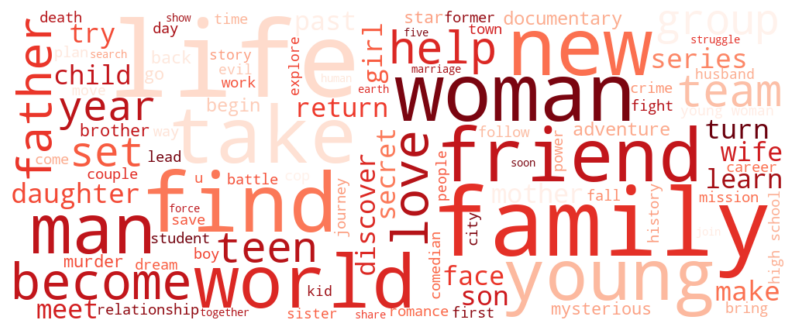

In [525]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Wordcloud expects a string of text
text = ' '.join([str(word) for word in desc_clean])
# Create a WordCloud object with custom parameters
text = text.replace("'", "") #delete the '
wordcloud = WordCloud(width=1000, height=400,  # Specify the width and height
                      max_words=100,          # Maximum number of words to display
                      background_color='white',  # Background color
                      colormap='Reds',     # Colormap for colors
                      contour_color='black',  # Contour color
                      contour_width=1,        # Contour width
                      stopwords=None).generate(text)  # Stopwords to exclude
# Display the WordCloud
plt.figure(figsize=(10, 5))  # Adjust the figure size
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [526]:
#!pip install imageio

C:\Users\pmort\AppData\Local\Temp\ipykernel_22420\4159342337.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask = imageio.imread("netflix.jpg")


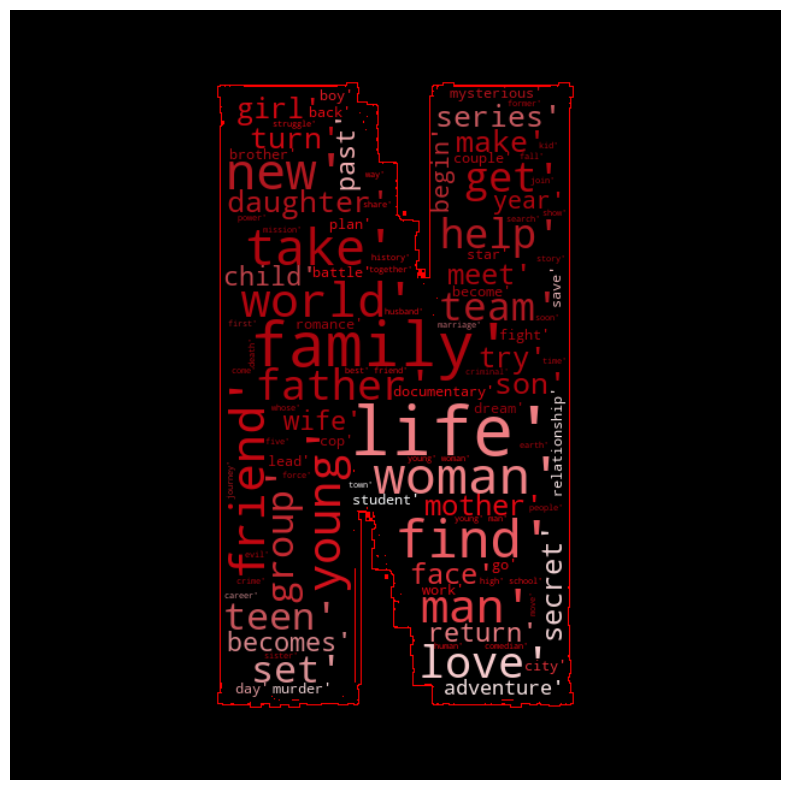

In [527]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import imageio
text = ' '.join([str(word) for word in desc_clean])
# Read the mask image
mask = imageio.imread("netflix.jpg")

# Create a WordCloud object with custom parameters
wordcloud = WordCloud(width=1000, height=400,  # Specify the width and height
                      max_words=100,          # Increase the maximum number of words
                      background_color='black',  # Background color
                      colormap='Reds',     # Change the colormap
                      contour_color='red',  # Contour color
                      contour_width=1,        # Contour width
                      mask=mask,              # Add the mask
                      stopwords=None).generate(text)  # Stopwords to exclude

# Create a color generator from the mask image
color_gen = ImageColorGenerator(mask)

# Apply the color generator to the word cloud
wordcloud.recolor(color_func=color_gen)

# Display the WordCloud
plt.figure(figsize=(20, 10))  # Adjust the figure size
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 8c - Flattem the list, Count the Frequency and Create a Dataframe

In [528]:
import matplotlib.pyplot as plt
from collections import Counter
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [529]:
# Flatten the list of tokens so that each individual element will become a row in the Dataframe
flat_list = list(itertools.chain(*desc_clean))
# Count the frequency of each word
word_freq = Counter(flat_list)
# Create a DataFrame from the word frequencies
desc_final = pd.DataFrame.from_dict(word_freq, orient='index').reset_index()

In [530]:
# Rename the columns
desc_final.columns = ['Word', 'Frequency']


In [531]:
desc_final

,Word,Frequency
0,father,312
1,nears,6
2,end,99
3,life,1061
4,filmmaker,73
...,...,...
18264,kashaf,1
18265,zaroon,1
18266,sadist,1
18267,dorky,1


# 8c - Plot the 20 Most Common Words

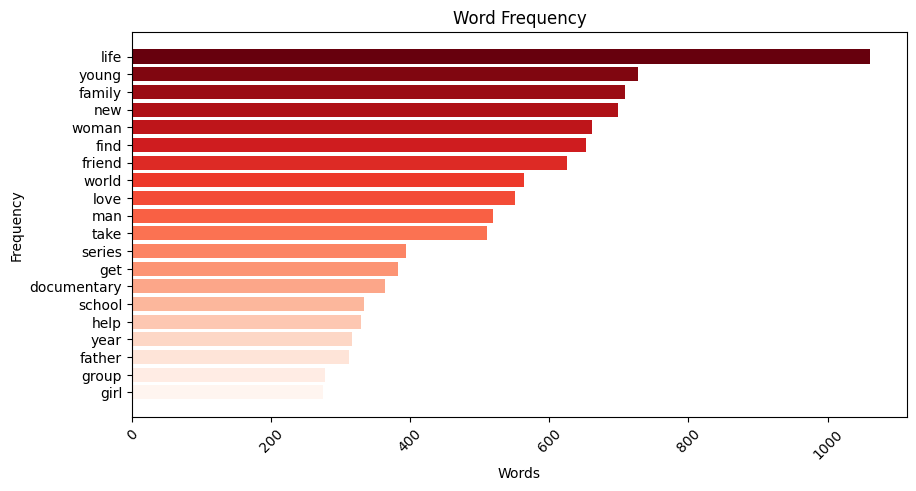

In [532]:
# Sort the DataFrame in descending order of frequency
desc_final = desc_final.sort_values('Frequency', ascending=False)
# Create a colormap of shades of red
cmap = plt.get_cmap('Reds')
colors = cmap(np.linspace(0, 1, 20))
# Reverse the colors array so the most frequent word is in a darker color
colors = colors[::-1]

plt.figure(figsize=(10, 5))
plt.barh(desc_final['Word'][:20], desc_final['Frequency'][:20], color=colors)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest frequency at the top
plt.show()

## 8d - Saving the Dataframe in the csv format 

In [533]:
desc_final = desc_final.to_csv('desc_final.csv', index=False)

## 9 - Create a subset of the Category Column, Tokenize and Clean

In [541]:
movies.columns

Index(['Show_id', 'Type', 'Title', 'Director', 'Cast', 'Country', 'Date',
       'Release_year', 'Classification', 'Duration', 'Category',
       'Description'],
      dtype='object')

In [542]:
movies_cat = movies[['Country', 'Category', 'Date']]
movies_cat

,Country,Category,Date
0,United States,Documentaries,2021-09-25
1,South Africa,"International TV Shows, TV Dramas, TV Mysteries",2021-09-24
2,Unknown,"Crime TV Shows, International TV Shows, TV Act...",2021-09-24
3,Unknown,"Docuseries, Reality TV",2021-09-24
4,India,"International TV Shows, Romantic TV Shows, TV ...",2021-09-24
...,...,...,...
8802,United States,"Cult Movies, Dramas, Thrillers",2019-11-20
8803,Unknown,"Kids' TV, Korean TV Shows, TV Comedies",2019-07-01
8804,United States,"Comedies, Horror Movies",2019-11-01
8805,United States,"Children & Family Movies, Comedies",2020-01-11


In [543]:
# Convert 'Date' column to datetime
movies_cat['Date'] = pd.to_datetime(movies_cat['Date'])

# Extract year from 'Date' column
movies_cat['Year'] = movies_cat['Date'].dt.year

# Print the DataFrame
movies_cat

C:\Users\pmort\AppData\Local\Temp\ipykernel_22420\2692172624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_cat['Date'] = pd.to_datetime(movies_cat['Date'])
C:\Users\pmort\AppData\Local\Temp\ipykernel_22420\2692172624.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_cat['Year'] = movies_cat['Date'].dt.year


,Country,Category,Date,Year
0,United States,Documentaries,2021-09-25,2021
1,South Africa,"International TV Shows, TV Dramas, TV Mysteries",2021-09-24,2021
2,Unknown,"Crime TV Shows, International TV Shows, TV Act...",2021-09-24,2021
3,Unknown,"Docuseries, Reality TV",2021-09-24,2021
4,India,"International TV Shows, Romantic TV Shows, TV ...",2021-09-24,2021
...,...,...,...,...
8802,United States,"Cult Movies, Dramas, Thrillers",2019-11-20,2019
8803,Unknown,"Kids' TV, Korean TV Shows, TV Comedies",2019-07-01,2019
8804,United States,"Comedies, Horror Movies",2019-11-01,2019
8805,United States,"Children & Family Movies, Comedies",2020-01-11,2020


## 9a - One-hot encode of the Category Column

In [544]:
#split the listed_in columns
movies_cat['Category'] = movies_cat['Category'].str.split(',')
movies_cat = movies_cat.explode('Category').reset_index(drop=True)
movies_cat = pd.get_dummies(movies_cat, columns=['Category'], dtype=int)
movies_cat

C:\Users\pmort\AppData\Local\Temp\ipykernel_22420\734567600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_cat['Category'] = movies_cat['Category'].str.split(',')


,Country,Date,Year,Category_ Anime Features,Category_ Children & Family Movies,Category_ Classic & Cult TV,Category_ Classic Movies,Category_ Comedies,Category_ Crime TV Shows,Category_ Cult Movies,...,Category_Sports Movies,Category_Stand-Up Comedy,Category_Stand-Up Comedy & Talk Shows,Category_TV Action & Adventure,Category_TV Comedies,Category_TV Dramas,Category_TV Horror,Category_TV Sci-Fi & Fantasy,Category_TV Shows,Category_Thrillers
0,United States,2021-09-25,2021,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,South Africa,2021-09-24,2021,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,South Africa,2021-09-24,2021,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,South Africa,2021-09-24,2021,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Unknown,2021-09-24,2021,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19289,United States,2020-01-11,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19290,United States,2020-01-11,2020,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
19291,India,2019-03-02,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19292,India,2019-03-02,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [546]:

# Group by 'Year', 'Country', and each category, and sum over the rows
grouped = movies_cat.groupby(['Year', 'Country'])[movies_cat.columns[3:]].sum().reset_index()

# Initialize an empty DataFrame to store the results
top_countries = pd.DataFrame()

# For each category, find the top 10 countries per year
# For each category, find the top 10 countries per year
for category in grouped.columns[2:]:
    top = grouped.groupby(['Year'])[category].nlargest(10).reset_index()
    top['Category'] = category
    top_countries = pd.concat([top_countries, top])

# Print the result
top_countries

Series([], Name: count, dtype: int64)

## 9b - Tokenize, Lowercase, Delete Stopwords and Lemmatize the Category Column

In [233]:
cat_list = [' Anime Features',
       ' Children & Family Movies', ' Classic & Cult ', ' Classic Movies',
       ' Comedies', ' Crime  Shows', ' Cult Movies', ' Documentaries',
       ' Docuseries', ' Dramas', ' Faith & Spirituality', ' Horror Movies',
       ' Independent Movies', ' International Movies', ' International  Shows',
       ' Kids' , ' Korean Shows', 'LGBTQ Movies', ' Music & Musicals',
       ' Reality ', ' Romantic Movies', ' Romantic  Shows',
       ' Sci-Fi & Fantasy', ' Science & Nature ', ' Spanish-Language  Shows',
       ' Sports Movies', ' Stand-Up Comedy', ' Stand-Up Comedy & Talk Shows',
       '  Action & Adventure', '  Comedies', '  Dramas', '  Horror',
       '  Mysteries', '  Sci-Fi & Fantasy', '  Thrillers', ' Teen  Shows',
       ' Thrillers', 'Action & Adventure', 'Anime Features', 'Anime Series',
       'British  Shows', 'Children & Family Movies', 'Classic & Cult ',
       'Classic Movies', 'Comedies', 'Crime  Shows', 'Cult Movies',
       'Documentaries', 'Docuseries', 'Dramas', 'Horror Movies',
       'Independent Movies', 'International Movies', 'International  Shows',
       'Kids' , 'LGBTQ Movies', 'Movies', 'Music & Musicals', 'Reality',
       'Romantic Movies', 'Romantic  Shows', 'Sci-Fi & Fantasy',
       'Spanish-Language  Shows', 'Sports Movies', 'Stand-Up Comedy',
       'Stand-Up Comedy & Talk Shows', ' Action & Adventure', ' Comedies',
       ' Dramas', ' Horror', ' Sci-Fi & Fantasy', ' Shows', 'Thrillers']

In [235]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

def preprocess_cat(text):
    # Tokenize the text
    words = word_tokenize(text)
        
    # Convert to lower case
    words = [word.lower() for word in words]
    words = [word for word in words if word.strip()]
    
    # Remove stopwords
    st_words = set(stopwords.words("english"))
    additional_stopwords = {'movies', '&', 'shows', 'series'}
    words = [word for word in words if word not in st_words and word not in additional_stopwords]
    
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    return words



## 9c - Find Unique Values

In [236]:
cat_unique = set()
cat_clean = []
for curr_cat in cat_list:
    temp_clean = preprocess_cat(curr_cat)
    cat_clean.append(temp_clean)
    for cat in temp_clean:
        cat_unique.add(cat)

In [247]:
cat_unique

{'action',
 'adventure',
 'anime',
 'british',
 'child',
 'classic',
 'comedy',
 'crime',
 'cult',
 'documentary',
 'docuseries',
 'drama',
 'faith',
 'family',
 'fantasy',
 'feature',
 'horror',
 'independent',
 'international',
 'kid',
 'korean',
 'lgbtq',
 'music',
 'musical',
 'mystery',
 'nature',
 'reality',
 'romantic',
 'sci-fi',
 'science',
 'spanish-language',
 'spirituality',
 'sport',
 'stand-up',
 'talk',
 'teen',
 'thriller'}

## 9d - Transform into a Dataframe and save as CSV

In [240]:
cat_final = pd.DataFrame(cat_unique, columns=['Categories'])

In [248]:
cat_final.head()

,Categories
0,child
1,spanish-language
2,thriller
3,crime
4,nature


In [249]:
cat_final = cat_final.to_csv('cat_final.csv', index=False)

## Data Visualization

In [250]:
movies_type = movies['Type'].value_counts()
movies_type

Type
Movie      6126
TV Show    2664
Name: count, dtype: int64

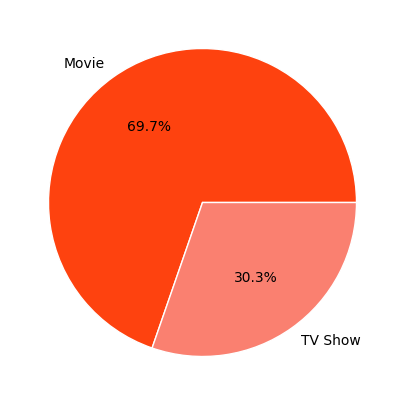

In [256]:
#%1.1f%%' one digit after comma and add the percentage symbol
#colors = ["#FE420F", "#FA8070"] 
cmap = plt.get_cmap('Reds')
plt.figure(figsize=(10,5))
plt.pie(movies_type, labels=movies['Type'].value_counts().index, autopct='%1.1f%%', colors=colors,wedgeprops = {"linewidth": 1, "edgecolor": "white"})
plt.show()

## Classification Description:


TV-MA (Mature Audiences Only): not suitable for children under 17.

TV-14 (Parents Strongly Cautioned): Some material may not be suitable for children under 14.

TV-PG (Parental Guidance Suggested): Some material may not be suitable for young children.

R (Restricted): Restricted to viewers over 17 years old or those accompanied by a parent or adult guardian.

PG-13 (Parents Strongly Cautioned): Some material may be inappropriate for children under 13 years old.

TV-Y7 (Directed to Older Children): Intended for children age 7 and above.

TV-Y (All Children): Suitable for all children.

PG (Parental Guidance Suggested): Some material may not be suitable for young children.

TV-G (General Audience): Suitable for all ages.

NR (Not Rated): The content has not been assigned a specific rating.

G (General Audience): Suitable for all ages.

TV-Y7-FV (Directed to Older Children - Fantasy Violence): Intended for children age 7 and above.

NC-17 (Adults Only): No one 17 and under admitted.

UR (Unrated): The content has not been assigned a specific rating or is an unrated version of a rated film.

## Find the Top Ten Classification

In [252]:
top10_class = movies['Classification'].value_counts().head(10)

In [182]:
top10_class

Classification
TV-MA    3205
TV-14    2157
TV-PG     861
R         799
PG-13     490
TV-Y7     333
TV-Y      306
PG        287
TV-G      220
NR         79
Name: count, dtype: int64

In [253]:
import matplotlib.patches as mpatches

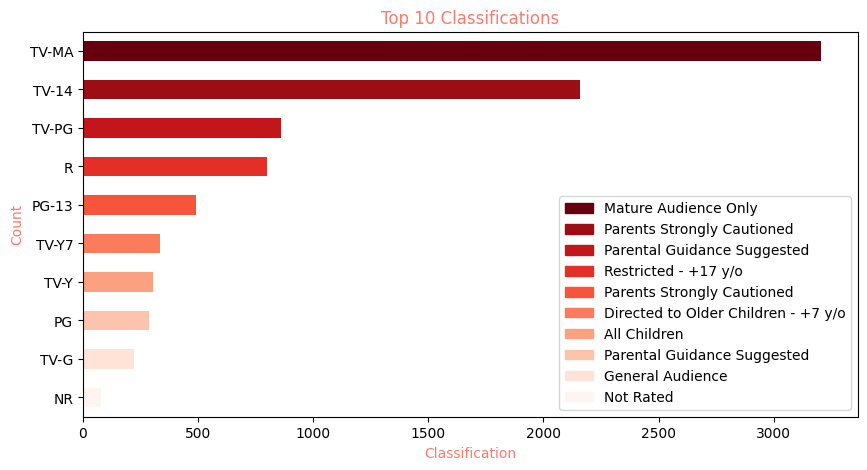

In [262]:
cmap = plt.get_cmap('Reds')
colors = cmap(np.linspace(0, 1, 10))
colors = colors[::-1]
plt.figure(figsize=(10, 5))
labels= ['Mature Audience Only', 'Parents Strongly Cautioned','Parental Guidance Suggested',
        'Restricted - +17 y/o','Parents Strongly Cautioned','Directed to Older Children - +7 y/o',
        'All Children', 'Parental Guidance Suggested', 'General Audience','Not Rated']

top10_class.plot(kind='barh', color=colors, label='Ratings')
plt.xlabel('Classification', color ="#FF796C")
plt.ylabel('Count', color="#FF796C")
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest frequency at the top
plt.title('Top 10 Classifications', color="#FF796C")

patches = []
for c, l in zip(colors, labels):
    patches.append(mpatches.Patch(color=c,label=l))

plt.legend(handles=patches)

plt.show()

In [300]:
movies.head()

,Show_id,Type,Title,Director,Cast,Country,Date,Release_year,Classification,Duration,Category,Description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


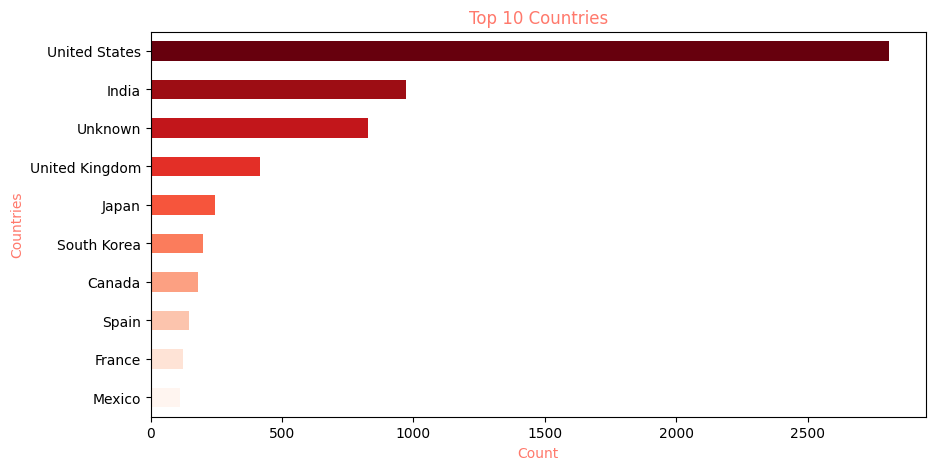

In [346]:
cmap = plt.get_cmap('Reds')
colors = cmap(np.linspace(0, 1, 10))
colors = colors[::-1]
plt.figure(figsize=(10, 5))
top10_country.plot(kind='barh', color=colors, label='Countries')
plt.xlabel('Count', color ="#FF796C")
plt.ylabel('Countries', color="#FF796C")
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest frequency at the top
plt.title('Top 10 Countries', color="#FF796C")


plt.show()

## Save movies as CSV

In [273]:
movies = movies.to_csv('movies.csv', index=False)

Create more CSVs

In [ ]:
num_records = movies['Category'].value_counts()
num_records

Category
Dramas, International Movies                                   362
Documentaries                                                  359
Stand-Up Comedy                                                334
Comedies, Dramas, International Movies                         274
Dramas, Independent Movies, International Movies               252
                                                              ... 
Crime TV Shows, International TV Shows, TV Sci-Fi & Fantasy      1
International TV Shows, TV Horror, TV Sci-Fi & Fantasy           1
Crime TV Shows, Kids' TV                                         1
Horror Movies, International Movies, Sci-Fi & Fantasy            1
Cult Movies, Dramas, Thrillers                                   1
Name: count, Length: 513, dtype: int64

In [347]:
# Save the result as a DataFrame
num_records_df = num_records.reset_index()
num_records_df.columns = ['Category', 'Count']

# Export the DataFrame to a CSV file
num_records_df.to_csv('num_records.csv', index=False)

In [342]:
num_records_df

,Category,Count
0,"Dramas, International Movies",362
1,Documentaries,359
2,Stand-Up Comedy,334
3,"Comedies, Dramas, International Movies",274
4,"Dramas, Independent Movies, International Movies",252
...,...,...
508,"Crime TV Shows, International TV Shows, TV Sci...",1
509,"International TV Shows, TV Horror, TV Sci-Fi &...",1
510,"Crime TV Shows, Kids' TV",1
511,"Horror Movies, International Movies, Sci-Fi & ...",1


## Top 10 Countries

In [357]:
movies_cat.columns

Index(['Show_id', 'Type', 'Title', 'Director', 'Cast', 'Country', 'Date',
       'Release_year', 'Classification', 'Duration',
       ...
       ' Dramas,  Sci-Fi & Fantasy, Teen  Shows', ' Dramas,  Thrillers',
       ' Dramas, Teen  Shows', ' Horror,  Mysteries,  Sci-Fi & Fantasy',
       ' Horror,  Mysteries,  Thrillers', ' Horror,  Mysteries, Teen  Shows',
       ' Horror, Teen  Shows', ' Sci-Fi & Fantasy,  Thrillers', ' Shows',
       'Thrillers'],
      dtype='object', length=524)

In [ ]:
# Assume 'category_columns' is a list of the category columns
category_columns = ['Category1', 'Category2', 'Category3', ...]

# Group by 'Country' and sum each category column
production_counts = movies.groupby('Country')[category_columns].sum().reset_index()

# Print the DataFrame
print(production_counts)

In [356]:
# Group by 'Country' and 'Category' and count the number of occurrences of each pair
production_counts = movies.groupby(['Country', 'Category']).size().reset_index(name='Count')
production_counts

,Country,Category,Count
0,", France, Algeria","Dramas, Independent Movies, International Movies",1
1,", South Korea","International TV Shows, TV Dramas",1
2,Argentina,"Action & Adventure, Comedies, International Mo...",1
3,Argentina,"Action & Adventure, Horror Movies, Internation...",1
4,Argentina,"Children & Family Movies, Music & Musicals",1
...,...,...,...
2788,Vietnam,"Dramas, International Movies",1
2789,Vietnam,"Dramas, International Movies, Romantic Movies",1
2790,Vietnam,"Horror Movies, International Movies, Thrillers",1
2791,West Germany,"Documentaries, International Movies",1


In [348]:
top10_country

Country
United States     2809
India              972
Unknown            829
United Kingdom     418
Japan              243
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

In [ ]:
top10_country = top10_country.reset_index()
top10_country.columns = ['Category', 'Count']

# Export the DataFrame to a CSV file
num_records_df.to_csv('num_records.csv', index=False)